# Linear regression

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import linear_model


In [3]:
df=pd.read_csv("FuelConsumption.csv")
df

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [4]:
print(df.info())
print("\n")
print(df.describe())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB
None


         Year  ENGINE SIZE   CYLINDERS  FUEL CONSUMPTION  COEMISSIONS 
count   639.0   639.000000  639.000000        639.000000    639.000000
mean   2000.0     3.265728    5.805947         14.713615    296.809077
std       0.0     1.231012    1.625588          

In [5]:
df.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [6]:
df.columns
cdf=df[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]  ### Selected appended and DataFrame create
cdf.head()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,1.6,4,10.5,216
1,1.6,4,9.8,205
2,3.2,6,13.7,265
3,3.5,6,15.0,301
4,1.8,4,11.4,230


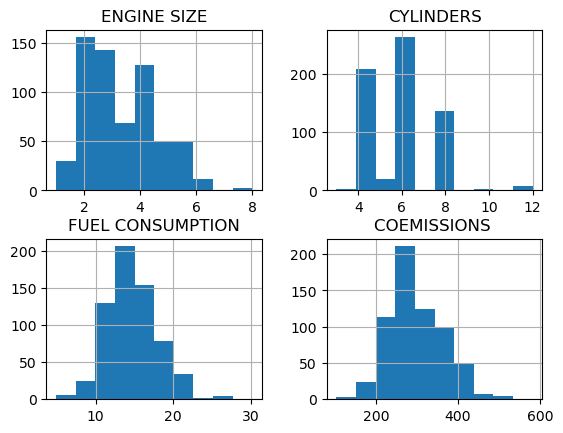

In [7]:
viz = cdf[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]
viz.hist()
plt.show()

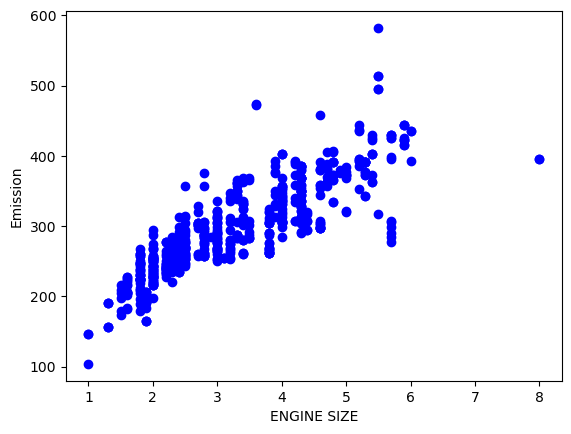

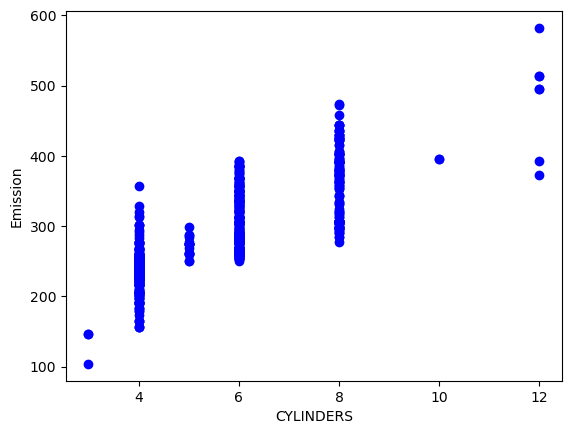

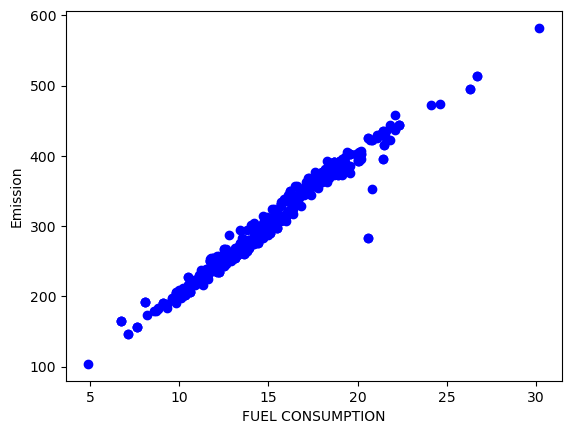

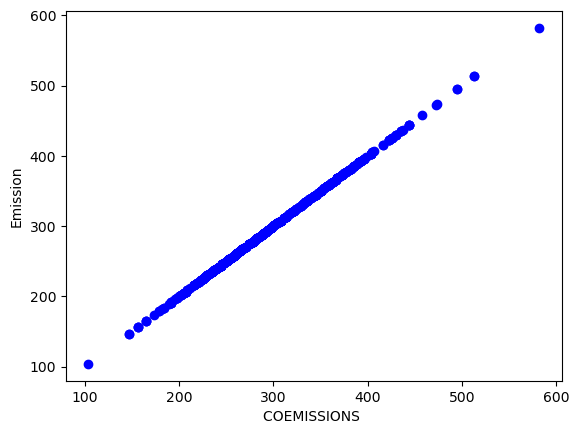

In [8]:
for i in cdf[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(cdf[i],cdf['COEMISSIONS '],color='blue')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()

In [9]:
mask=np.random.rand(len(df)) < 0.80                   ### Uniform Random Number
train=cdf[mask]
test=cdf[~mask]


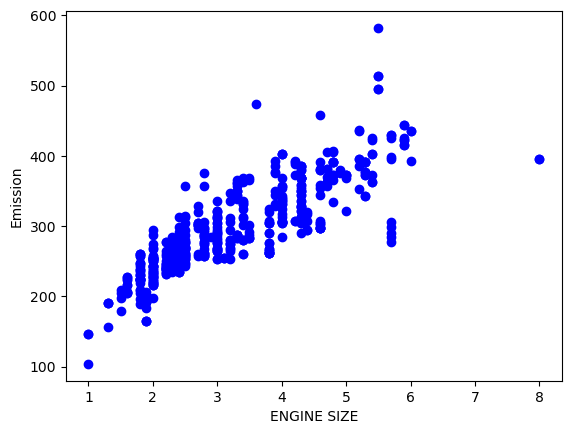

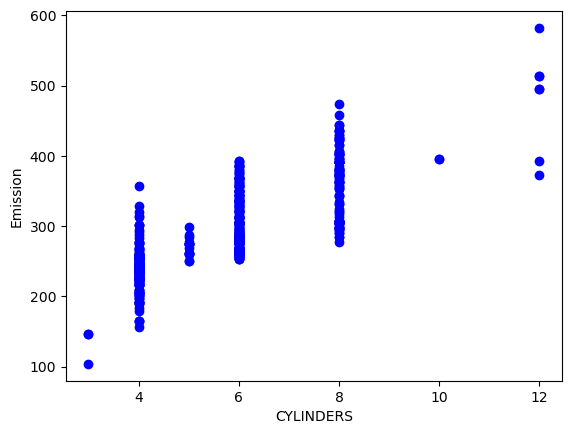

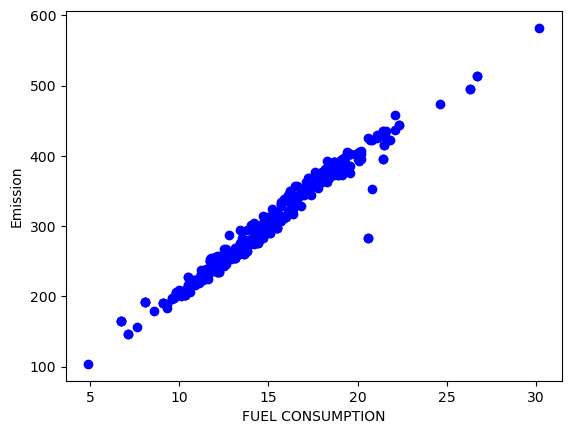

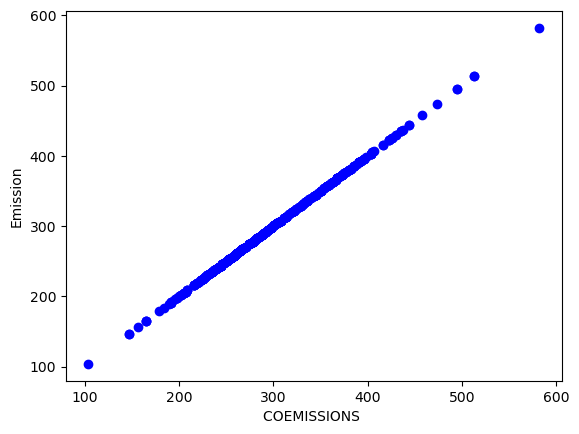

In [10]:
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(train[i],train['COEMISSIONS '],color='blue')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()

In [11]:
coefficient=[]
intercept=[]
regress_model={}
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    regr=linear_model.LinearRegression()
    train_x = np.asanyarray(train[[i]])
    train_y=  np.asanyarray(train[['COEMISSIONS ']])
    regr.fit(train_x, train_y)
    regress_model[i]=regr
    print("Relation between {} & {}".format(i,"'COEMISSIONS'"))
    print ('Coefficients: ', regr.coef_)
    print ('Intercept: ',regr.intercept_)
    coefficient.append(regr.coef_)
    intercept.append(regr.intercept_)
    
    print('\n')

Relation between ENGINE SIZE & 'COEMISSIONS'
Coefficients:  [[44.71537854]]
Intercept:  [151.63473396]


Relation between CYLINDERS & 'COEMISSIONS'
Coefficients:  [[31.29968094]]
Intercept:  [115.19018532]


Relation between FUEL CONSUMPTION & 'COEMISSIONS'
Coefficients:  [[19.27097325]]
Intercept:  [13.26467585]


Relation between COEMISSIONS  & 'COEMISSIONS'
Coefficients:  [[1.]]
Intercept:  [5.68434189e-14]




(514,)
(514,)


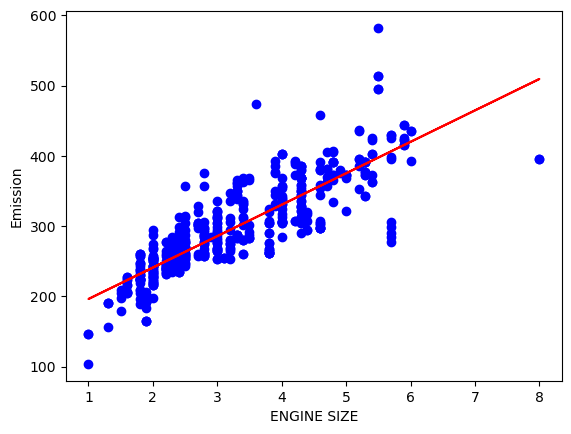

(514,)
(514,)


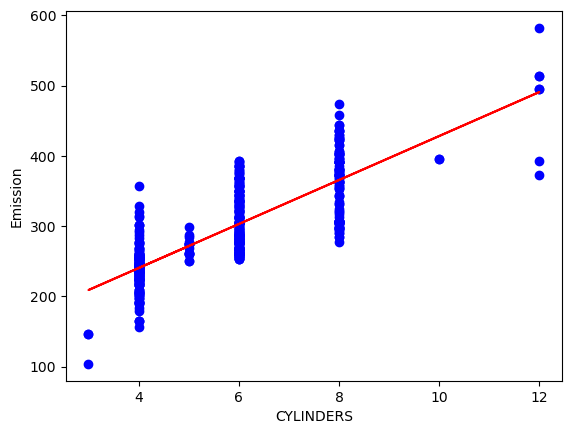

(514,)
(514,)


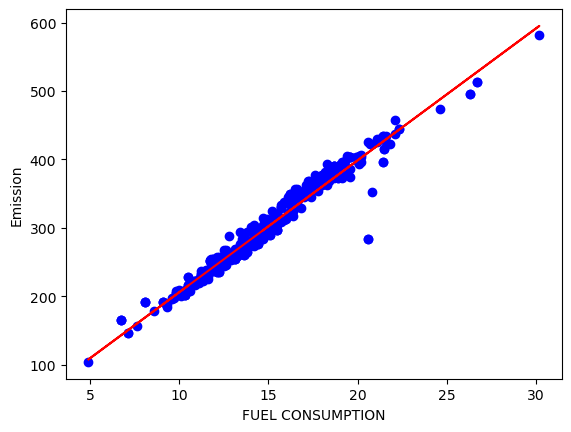

(514,)
(514,)


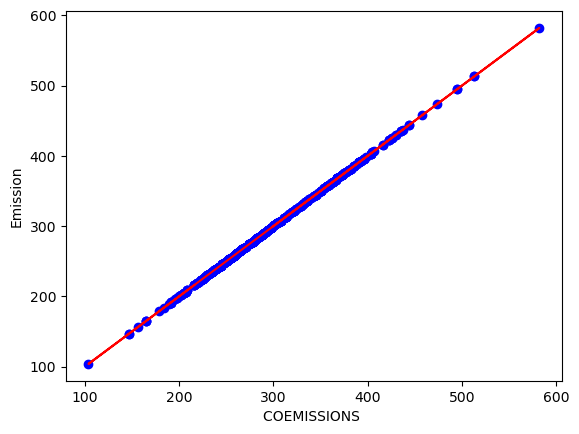

In [12]:
j=0
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(train[i], train['COEMISSIONS '],  color='blue')
    x=train[i].values
    print(x.shape)
    y=coefficient[j][0]*x + intercept[j]
    print(y.shape)
    l=len(y)
    y=np.reshape(y,(l,))
    plt.plot(x, y, '-r')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()
    j=j+1

In [13]:
from sklearn.metrics import r2_score

for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    test_x = np.asanyarray(test[[i]])
    test_y = np.asanyarray(test[['COEMISSIONS ']])
    test_y_ = regress_model[i].predict(test_x)
    print("Fitting Error between {} & {}".format(i,"'CO2EMISSIONS'"))
    print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    print('\n')

Fitting Error between ENGINE SIZE & 'CO2EMISSIONS'
Mean absolute error: 23.50
Residual sum of squares (MSE): 1028.40
R2-score: 0.67


Fitting Error between CYLINDERS & 'CO2EMISSIONS'
Mean absolute error: 32.27
Residual sum of squares (MSE): 1571.01
R2-score: 0.27


Fitting Error between FUEL CONSUMPTION & 'CO2EMISSIONS'
Mean absolute error: 6.54
Residual sum of squares (MSE): 63.61
R2-score: 0.98


Fitting Error between COEMISSIONS  & 'CO2EMISSIONS'
Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00




# Logistic Regression

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [15]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
pred_prob = model.predict_proba(X_test)

In [20]:
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [21]:
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print("AUC score = ", auc_score)

AUC score =  0.9762374461979914


C:\Users\hp\AppData\Local\Temp\ipykernel_10324\341508409.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


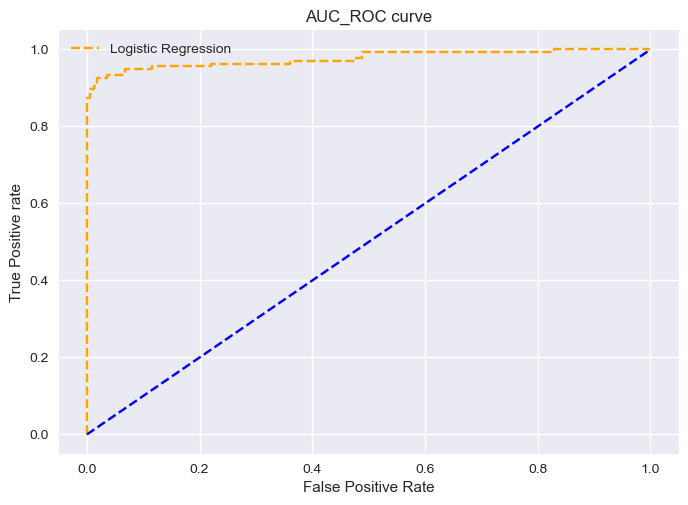

In [22]:
plt.style.use('seaborn')


plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('AUC_ROC curve')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();